# **Import libraries**


In [1]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_

True

In [2]:
! pip install keras_preprocessing


### **Load Dataset**


In [2]:
import pandas as pd
import chardet

with open("Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("Dataset.csv", engine='python', encoding=result['encoding'])
df['category'].value_counts()

category
Employee Health, Safety & Wellness                 12
Training & Development                             11
Water Use & Management                             11
Energy Management                                   8
Waste Management & Effluents                        7
Environmental Impact of Cotton and Other Fibres     6
Policies, Standards, Code of Conduct                5
Long term Viability of Core Business                5
Community Development                               5
Chemical Risks and Management                       4
Communication & Engagement                          4
Research, Development & Innovation                  4
Access to Services                                  2
Labour Relations & Union Practices                  2
Board Structure & Independence                      2
Education                                           1
Developing Vocational Skills                        1
Supply Chain Standards & Selection                  1
Customer Satisfacti

In [3]:
df.to_csv("~/Dataset.csv", index=False)

print(df)

                                category  \
0   Policies, Standards, Code of Conduct   
1     Employee Health, Safety & Wellness   
2   Long term Viability of Core Business   
3                 Product Societal Value   
4   Policies, Standards, Code of Conduct   
..                                   ...   
94    Employee Health, Safety & Wellness   
95    Labour Relations & Union Practices   
96                Training & Development   
97                Training & Development   
98                Training & Development   

                                                 text  
0   HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...  
1   NURTURE TALENT ......... DO GOOD BUILD LEADERS...  
2   COMPANY PROFILE With a market cap of USD 1.3 b...  
3   Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...  
4   CHARTERS, PRINCIPLES AND COALITIONS Our long-s...  
..                                                ...  
94  CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...  
95  We have structured 

# **Data Cleaning**


In [4]:
df['text']=df['text'].fillna("") 
df.isna().sum()



category    0
text        0
dtype: int64

# **Preprocessing**


In [5]:
# Detect encoding and load CSV file
with open("Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("Dataset.csv", engine='python', encoding=result['encoding'])

# Display the category value counts
# print(df['category'].value_counts())

# Convert to lower case, strip whitespace, and remove newline characters
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

# Remove non-alphabetic characters and non-ASCII characters
df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# Remove URLs
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize text
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

# Define stopwords list
stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

# Remove stopwords
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

# Filter out short words
df['short_word'] = df['stop_words'].str.findall('\w{2,}')  # Finding out words with length of 2 words by applying regex
df['string'] = df['short_word'].str.join(' ')   

# Lemmatize text (text normalization in NLP) (returns base form of words)
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(df['Text'])


0     hile action always speak louder word well arti...
1     nurture talent do good build leader do empower...
2     company profile market cap usd billion 85 year...
3     vision will enable people experience better qu...
4     charter principle coalition long standing comm...
                            ...                        
94    case study combating fire incident santej chal...
95    structured policy process various management s...
96    laying strong foundation productivity reportin...
97    development programme develop potential never ...
98    training development committed growth developm...
Name: Text, Length: 99, dtype: object


In [6]:
df

,category,text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,"Policies, Standards, Code of Conduct","HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...","hile actions always speak louder than words, w...",hile actions always speak louder than words w...,hile actions always speak louder than words w...,"[hile, actions, always, speak, louder, than, w...","['hile', 'actions', 'always', 'speak', 'louder...","[hile, actions, always, speak, louder, words, ...",hile actions always speak louder words well ar...,hile action always speak louder word well arti...
1,"Employee Health, Safety & Wellness",NURTURE TALENT ......... DO GOOD BUILD LEADERS...,nurture talent ......... do good build leaders...,nurture talent do good build leaders...,nurture talent do good build leaders...,"[nurture, talent, do, good, build, leaders, do...","['nurture', 'talent', 'do', 'good', 'build', '...","[nurture, talent, do, good, build, leaders, do...",nurture talent do good build leaders do empowe...,nurture talent do good build leader do empower...
2,Long term Viability of Core Business,COMPANY PROFILE With a market cap of USD 1.3 b...,company profile with a market cap of usd 1.3 b...,company profile with a market cap of usd b...,company profile with a market cap of usd b...,"[company, profile, with, a, market, cap, of, u...","['company', 'profile', 'market', 'cap', 'usd',...","[company, profile, market, cap, usd, billion, ...",company profile market cap usd billion 85 year...,company profile market cap usd billion 85 year...
3,Product Societal Value,Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,"[vision, we, will, enable, people, to, experie...","['vision', 'will', 'enable', 'people', 'experi...","[vision, will, enable, people, experience, bet...",vision will enable people experience better qu...,vision will enable people experience better qu...
4,"Policies, Standards, Code of Conduct","CHARTERS, PRINCIPLES AND COALITIONS Our long-s...","charters, principles and coalitions our long-s...",charters principles and coalitions our long s...,charters principles and coalitions our long s...,"[charters, principles, and, coalitions, our, l...","['charters', 'principles', 'coalitions', 'long...","[charters, principles, coalitions, long, stand...",charters principles coalitions long standing c...,charter principle coalition long standing comm...
...,...,...,...,...,...,...,...,...,...,...
94,"Employee Health, Safety & Wellness",CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,"[case, study, combating, fire, incidents, sant...","['case', 'study', 'combating', 'fire', 'incide...","[case, study, combating, fire, incidents, sant...",case study combating fire incidents santej cha...,case study combating fire incident santej chal...
95,Labour Relations & Union Practices,We have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,"[we, have, structured, policies, and, processe...","['structured', 'policies', 'processes', 'vario...","[structured, policies, processes, various, man...",structured policies processes various manageme...,structured policy process various management s...
96,Training & Development,LAYING A STRONG FOUNDATION FOR PRODUCTIVITY In...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,"[laying, a, strong, foundation, for, productiv...","['laying', 'strong', 'foundation', 'productivi...","[laying, strong, foundation, productivity, rep...",laying strong foundation productivity reportin

## Visualization


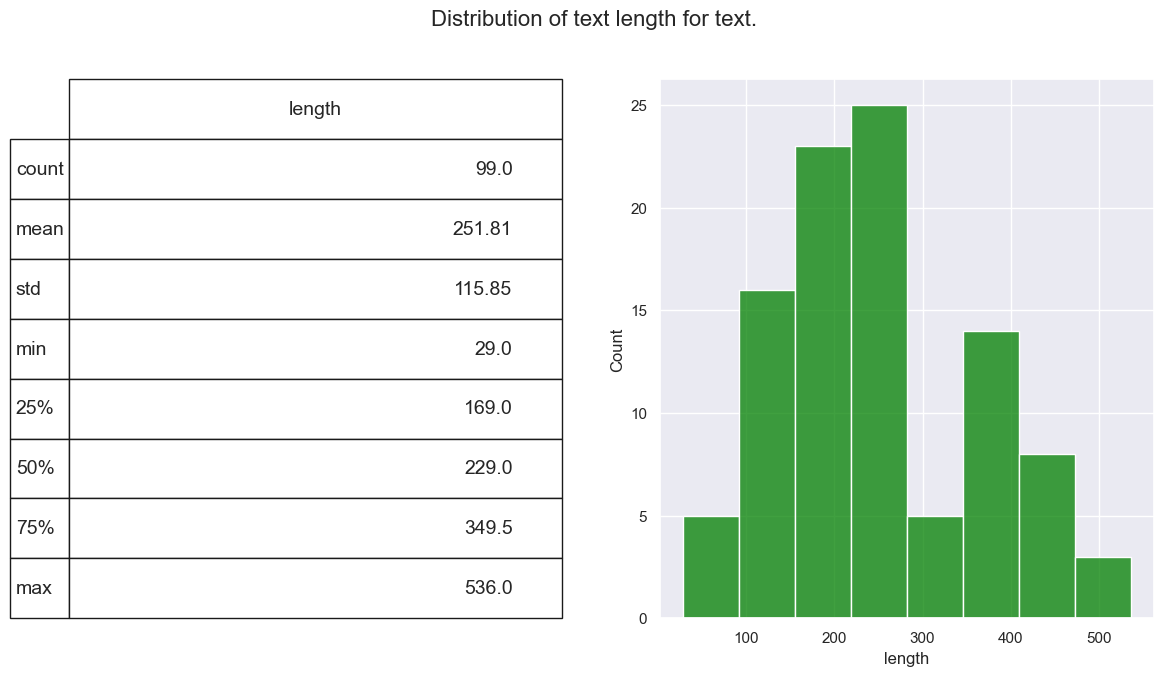

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(14,7)) # Creates a figure with a size of 14x7 inches
df['length'] = df.text.str.split().apply(len) # Creates a new column
ax1 = fig.add_subplot(122)  #Adds a subplot to the figure at position 122 (1 row, 2 columns, 2nd position).
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2) # rounds to 2 decimal place

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

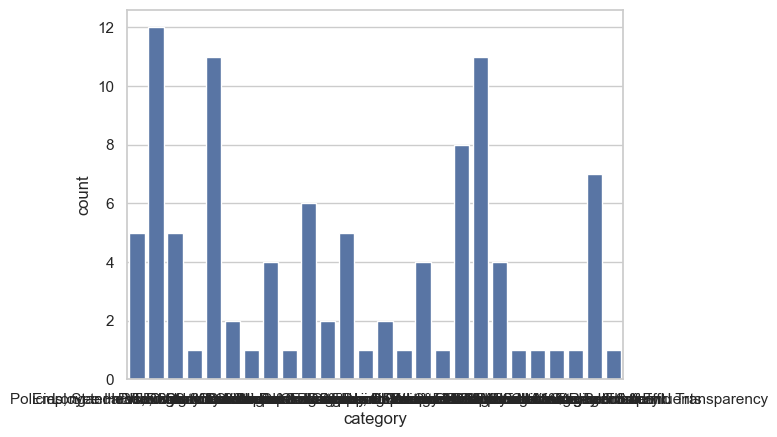

In [8]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [9]:
from collections import Counter
import plotly.express as px


top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')


In [10]:
sport_text = df[df['category']=='Policies, Standards, Code of Conduct']
business_text = df[df['category']=='Employee Health, Safety & Wellness'] 
politics_text = df[df['category']=='Long term Viability of Core Business']
tech_text = df[df['category']=='Training & Development'] 
entertainment_text = df[df['category']=='Board Structure & Independence'] 

In [12]:
%pip install pip>=24.1.2
%pip install nbfomat>=4.2.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nbfomat (from versions: none)
ERROR: No matching distribution found for nbfomat


In [13]:
! conda install nbformat --verbose

Channels:

info     libmamba Reading cache files 'C:\Users\MAHISH~1\AppData\Local\Temp\tmpryk67iph.json.*' for repo index 'installed'
info     libmamba Reading repodata.json file "C:\\Users\\MAHISH~1\\AppData\\Local\\Temp\\tmpryk67iph.json" for repo installed
info     libmamba Reading cache files 'C:\Users\MahishaMudaliar\anaconda3\pkgs\cache\59ba4880.json.*' for repo index 'https://repo.anaconda.com/pkgs/main/win-64'
info     libmamba Reading repodata.json file "C:\\Users\\MahishaMudaliar\\anaconda3\\pkgs\\cache\\59ba4880.json" for repo https://repo.anaconda.com/pkgs/main/win-64
info     libmamba Writing libsolv solv file "C:\\Users\\MahishaMudaliar\\anaconda3\\pkgs\\cache\\59ba4880.solv" for repo https://repo.anaconda.com/pkgs/main/win-64
info     libmamba Reading cache files 'C:\Users\MahishaMudaliar\anaconda3\pkgs\cache\3e39a7aa.json.*' for repo index 'https://repo.anaconda.com/pkgs/main/noarch'
info     libmamba Reading repodata.json file "C:\\Users\\MahishaMudaliar\\anaconda3\\pkgs\\cache\\


 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [11]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

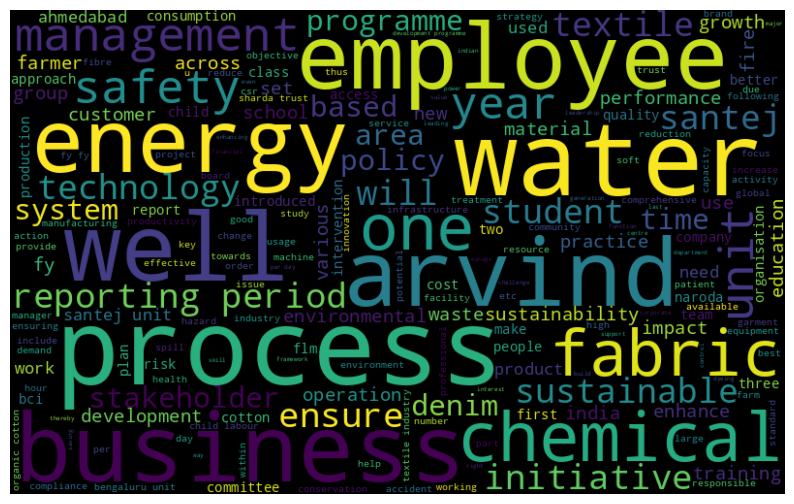

In [12]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

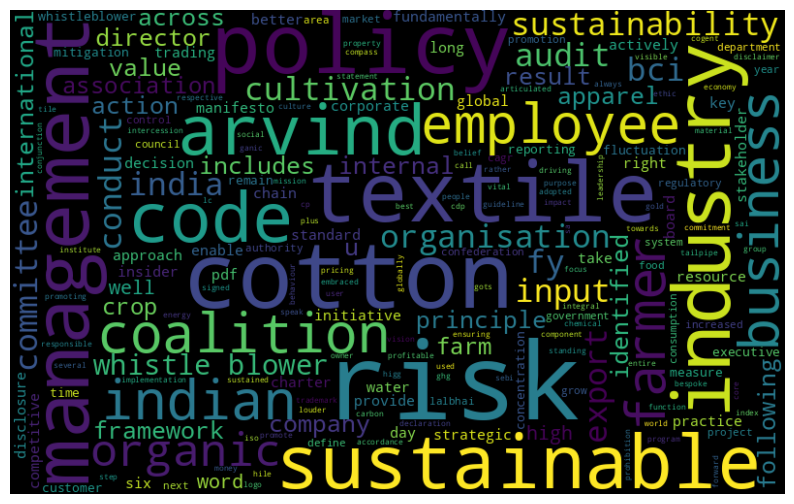

In [13]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

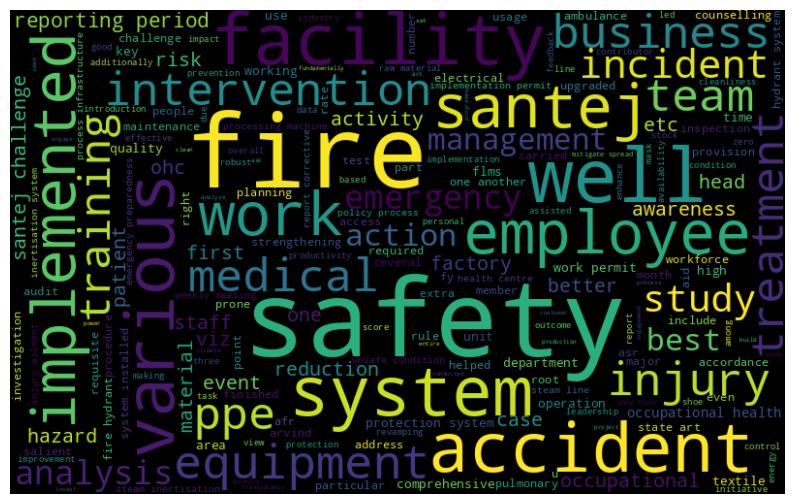

In [14]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Employee Health, Safety & Wellness']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

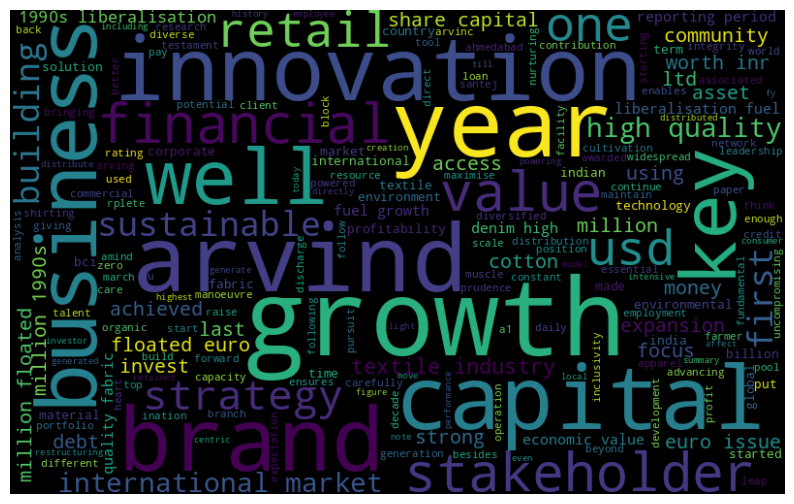

In [15]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Long term Viability of Core Business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

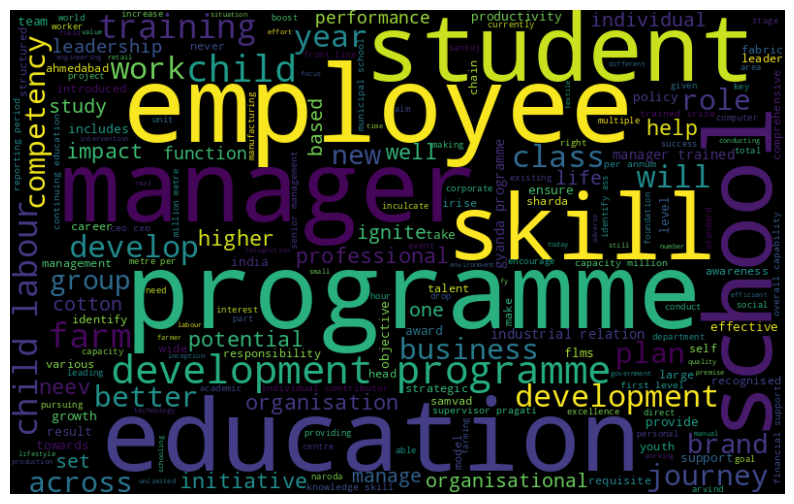

In [16]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Training & Development']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

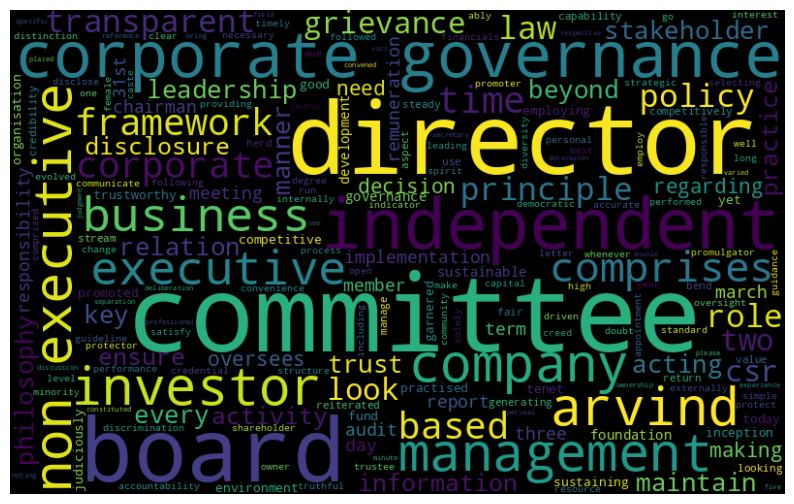

In [17]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Board Structure & Independence']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

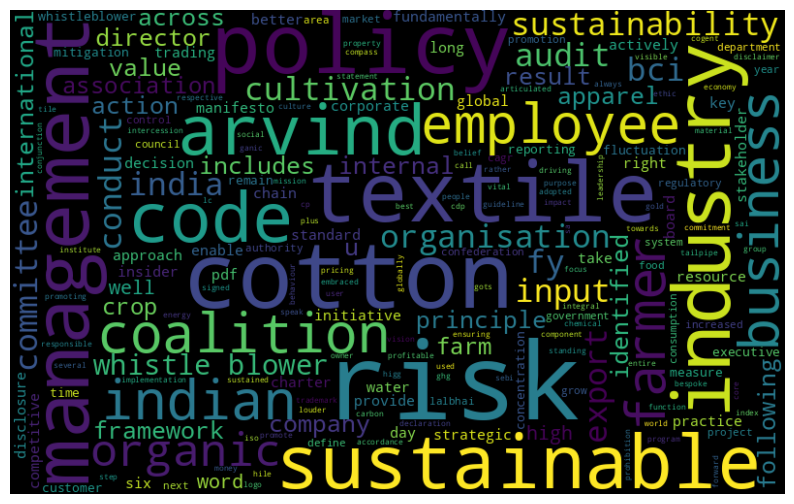

In [18]:

normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(74, 11578) (25, 11578) (74,) (25,)


In [20]:
joblib.dump(count_vect, 'count_vect.pkl')
model = joblib.load('count_vect.pkl')

# **Machine Learning Models**


# **Logistic Regression**


In [21]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.52
                                                 precision    recall  f1-score   support

                  Chemical Risks and Management       1.00      1.00      1.00         1
                     Communication & Engagement       0.00      0.00      0.00         2
                          Community Development       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.18      1.00      0.31         2
                              Energy Management       1.00      1.00      1.00         3
Environmental Impact of Cotton and Other Fibres       0.50      1.00      0.67         1
             Labour Relations & Union Practices       0.00      0.00      0.00         1
           Long term Viability of Core Business       1.00      1.00      1.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
             Research, Development & Innovation       1.00      0.50      0.67         2
     

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-define

In [22]:
# Save the trained model
joblib.dump(lr, 'logistic_regression_model.pkl')
 
# Save the CountVectorizer
joblib.dump(count_vect, 'count_vect.pkl')
 

['count_vect.pkl']

In [23]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner 11"])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['Board Structure & Independence']


# **Support Vector Machine**


In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.64
                                                 precision    recall  f1-score   support

                  Chemical Risks and Management       1.00      1.00      1.00         1
                     Communication & Engagement       1.00      1.00      1.00         2
                          Community Development       0.00      0.00      0.00         0
                   Developing Vocational Skills       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.50      1.00      0.67         2
                              Energy Management       0.75      1.00      0.86         3
Environmental Impact of Cotton and Other Fibres       0.33      1.00      0.50         1
             Labour Relations & Union Practices       1.00      1.00      1.00         1
           Long term Viability of Core Business       1.00      1.00      1.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
     

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-define

In [25]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner"])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['Board Structure & Independence']


## **Naive Bayes(Multinomial)**


In [26]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.36
                                                 precision    recall  f1-score   support

                  Chemical Risks and Management       0.00      0.00      0.00         1
                     Communication & Engagement       0.00      0.00      0.00         2
                          Community Development       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.12      1.00      0.22         2
                              Energy Management       1.00      0.67      0.80         3
Environmental Impact of Cotton and Other Fibres       0.00      0.00      0.00         1
             Labour Relations & Union Practices       0.00      0.00      0.00         1
           Long term Viability of Core Business       1.00      1.00      1.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
             Research, Development & Innovation       0.00      0.00      0.00         2
     

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-define

In [27]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['Employee Health, Safety & Wellness']


# **Comparison Between ML Models**


In [28]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
})

In [29]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes
Accuracy,52.000000,64.000000,36.000000
F1_score,45.370527,52.984127,25.225885
Recall,52.000000,64.000000,36.000000
Precision,52.000000,64.000000,36.000000
